In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
gender_submission_df = pd.read_csv('/content/drive/MyDrive/gender_submission.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,0,3,0,22.0,1,0,1,3
1,2,1,1,1,38.0,1,0,2,4
2,3,1,3,1,26.0,0,0,1,2
3,4,1,1,1,35.0,1,0,1,4
4,5,0,3,0,35.0,0,0,1,3


In [ ]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,0,34.5,0,0,3,3
1,893,3,1,47.0,1,0,1,4
2,894,2,0,62.0,0,0,3,3
3,895,3,0,27.0,0,0,1,3
4,896,3,1,22.0,1,1,1,4


In [ ]:
#No. of rows and columns in train 
print(f'No. of rows in train datset: {train_df.shape[1]}')
print(f'No. of columns in train datset: {train_df.shape[0]}')
#No. of rows and columns in test
print(f'No. of rows in test datset: {test_df.shape[1]}')
print(f'No. of columns in test datset: {test_df.shape[0]}')
#No. of rows and columns in gender submission dataset
print(f'No. of rows in gender submission datset: {gender_submission_df.shape[1]}')
print(f'No. of columns in gender submission datset: {gender_submission_df.shape[0]}')

No. of rows in train datset: 12
No. of columns in train datset: 891
No. of rows in test datset: 11
No. of columns in test datset: 418
No. of rows in gender submission datset: 2
No. of columns in gender submission datset: 418


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df[['Age','Cabin','Embarked']].isnull().any()

Age         True
Cabin       True
Embarked    True
dtype: bool

In [ ]:
pd.isnull(train_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [ ]:
#Removing unnecessary columns
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
pd.isnull(test_df).sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [ ]:
#Removing unnecessary columns
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Fare'], axis=1)

In [ ]:
#Converting gender to numerical values
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1})
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1})

In [ ]:
#Converting Embarked to numerical values
train_df['Embarked'] = train_df['Embarked'].map({'S':1,'C':2,'Q':3})
test_df['Embarked'] = test_df['Embarked'].map({'S':1,'C':2,'Q':3})

In [ ]:
train_df['Name'].str.extract(' ([A-Za-z]+)\.').value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
dtype: int64

In [ ]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.')
train_df['Title'] = train_df['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace('Ms','Miss')
train_df['Title'] = train_df['Title'].replace('Mme','Mrs')

In [ ]:
test_df['Name'].str.extract(' ([A-Za-z]+)\.').value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
dtype: int64

In [ ]:
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.')
test_df['Title'] = test_df['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test_df['Title'] = test_df['Title'].replace('Mlle','Miss')
test_df['Title'] = test_df['Title'].replace('Ms','Miss')
test_df['Title'] = test_df['Title'].replace('Mme','Mrs')

In [ ]:
#Converting title to numerical value
train_df['Title'] = train_df['Title'].map({"Master":1, "Miss": 2, "Mr":3, "Mrs":4, "Rare":5, "Royal":6})
test_df['Title'] = test_df['Title'].map({"Master":1, "Miss": 2, "Mr":3, "Mrs":4, "Rare":5, "Royal":6})

In [ ]:
#Dropping Name column
train_df = train_df.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)

In [ ]:
#Counting no. of male and female passengers
print(train_df['Sex'].value_counts())

0    577
1    314
Name: Sex, dtype: int64


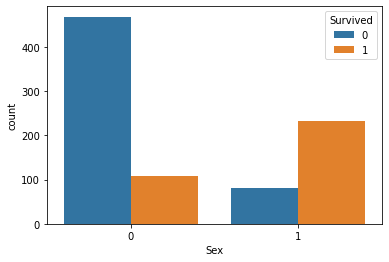

In [ ]:
#Plotting male or female countplot
sns.countplot(x='Sex',hue='Survived',data=train_df)  
plt.show()  

Text(0, 0.5, 'Nummber of people died')

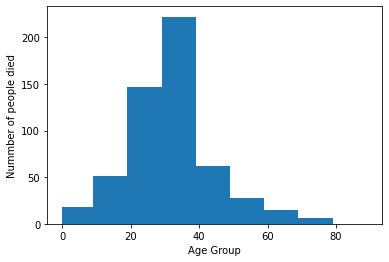

In [ ]:
#Plotting histogram of died passengers
data = train_df[train_df['Survived']==0]['Age']
binwidth = 9
plt.hist(data,bins=[0,9,19,29,39,49,59,69,79,89],)#range(int(min(data)), int(max(data)) + binwidth, binwidth))
plt.xlabel('Age Group')
plt.ylabel('Nummber of people died')

Text(0, 0.5, 'Nummber of people survived')

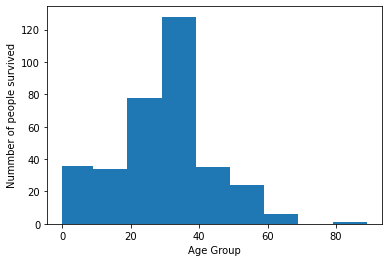

In [ ]:
#Plotting histogram of survived passengers
data = train_df[train_df['Survived']==1]['Age']
binwidth = 9
plt.hist(data,bins=[0,9,19,29,39,49,59,69,79,89],)#range(int(min(data)), int(max(data)) + binwidth, binwidth))
plt.xlabel('Age Group')
plt.ylabel('Nummber of people survived')

In [ ]:
#Minor children died and survived
train_df[train_df['Age']<16]['Survived'].value_counts()

1    49
0    34
Name: Survived, dtype: int64

22.117886885245902


(array([ 14.,   1.,   6., 227.,  40.,  34.,  27.,  15.,   6.,  16.]),
 array([ 0.   ,  2.211,  4.422,  6.633,  8.844, 11.055, 13.266, 15.477,
        17.688, 19.899, 22.11 ]),
 <a list of 10 Patch objects>)

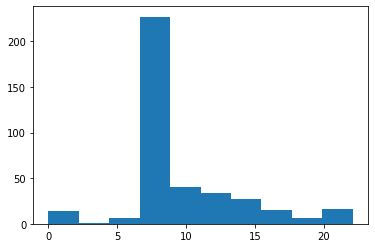

In [ ]:
#Died on the basis of fare paid
train = pd.read_csv('/content/drive/MyDrive/train.csv')
data = train[train['Survived']==0]['Fare']
print(data.mean())
plt.hist(data,range=(0,22.11))

In [ ]:
#Bias and percentage for rich (Biased)
print(train['Survived'].value_counts())
x = train[train['Fare']>100]
perc1 = (len(x[x['Survived']==1])/len(x['Survived']))*100
y = train[train['Fare']<20]
perc2 = (len(y[y['Survived']==1])/len(y['Survived']))*100
print(perc1)
print(perc2)
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

0    549
1    342
Name: Survived, dtype: int64
73.58490566037736
27.766990291262132


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


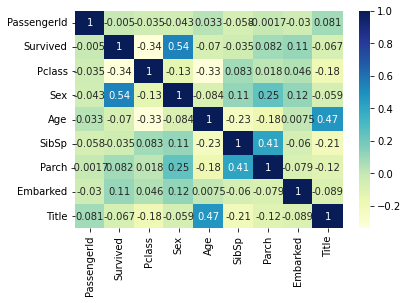

In [ ]:
#Plotting correlation heatmap
dataplot = sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#Number of people who were married
print(2*len(train_df[train_df['Title']==4]))

252


In [ ]:
data.mean()

22.117886885245902

In [ ]:
x

27     False
31      True
88      True
118    False
195     True
215     True
258     True
268     True
269     True
297    False
299     True
305     True
306     True
307     True
311     True
318     True
319     True
325     True
332    False
334     True
337     True
341     True
373    False
377    False
380     True
390     True
393     True
435     True
438    False
498    False
505    False
527    False
537     True
544    False
550     True
557    False
581     True
609     True
659    False
660     True
679     True
689     True
698    False
700     True
708     True
716     True
730     True
737     True
742     True
763     True
779     True
802     True
856     True
Name: Survived, dtype: bool